In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

digits = datasets.load_digits()

In [2]:
#I. Classification

In [3]:
#1. k-Nearest Neighbours

In [4]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
knnvals = pd.DataFrame(columns=['train', 'test'])

for i in range(1,9):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train, y_train)
    new = pd.Series({'train':kNN.score(X_train, y_train), 'test':kNN.score(X_test, y_test)})
    knnvals = pd.concat([knnvals, new.to_frame().T], ignore_index=True)
knnvals.set_index([pd.Index(range(1,9))])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,train,test
1,1.000000,0.986111
2,0.990953,0.977778
3,0.993737,0.986111
4,0.992345,0.980556
5,0.990257,0.988889
6,0.990257,0.983333
7,0.988866,0.986111
8,0.988170,0.986111


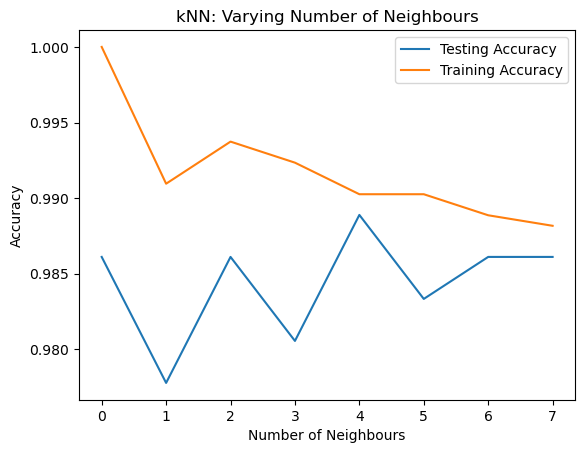

In [6]:
plt.plot(knnvals.index, knnvals['test'], knnvals['train'])
plt.title('kNN: Varying Number of Neighbours')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.legend(['Testing Accuracy', 'Training Accuracy'])

In [7]:
#2. Support Vector Machine

In [8]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.95      1.00      0.97        35
           2       0.97      1.00      0.98        30
           3       0.98      1.00      0.99        43
           4       1.00      1.00      1.00        27
           5       1.00      0.97      0.98        32
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        34
           8       1.00      0.92      0.96        39
           9       0.97      0.97      0.97        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [9]:
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        32
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        39
           9       0.95      1.00      0.97        39

    accuracy                           0.99       360
   macro avg       1.00      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [10]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.73      0.63      0.68        35
           2       0.90      0.87      0.88        30
           3       1.00      0.93      0.96        43
           4       0.78      0.93      0.85        27
           5       0.94      0.97      0.95        32
           6       0.95      0.98      0.96        42
           7       0.86      0.94      0.90        34
           8       0.82      0.72      0.77        39
           9       0.84      0.92      0.88        39

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.88       360
weighted avg       0.88      0.88      0.88       360



In [11]:
# In this case, the poly kernel should be used, as is has the highest precision, recall and f1-score.

In [12]:
#3. Naïve Bayes

<AxesSubplot:>

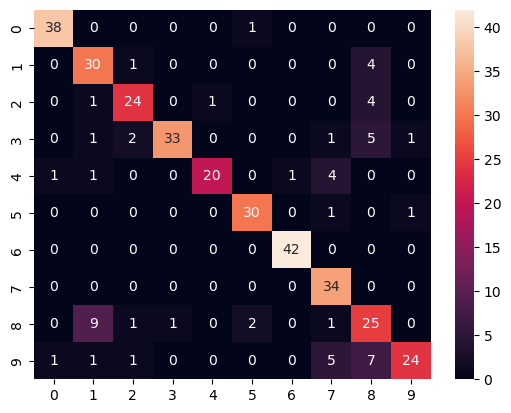

In [13]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0, 0.5, 'Accuracy')

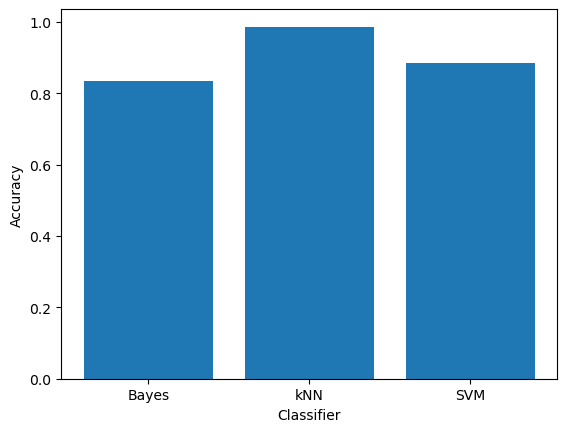

In [14]:
data=[bayes.score(X_test, y_test), kNN.score(X_test, y_test), svm.score(X_test, y_test)]
cols=['Bayes', 'kNN', 'SVM']

fig, ax = plt.subplots()

ax.bar(cols, data)
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')

In [15]:
# II. Regression

In [16]:
# 1. Linear Regression

In [17]:
gm = pd.read_csv('gapminder.csv')
gm

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832,2.11,0.5,2.489764,26.39123,15317,124.2604,76.0,13.0,America
135,26952719,2.46,0.1,4.476669,25.32054,3733,124.3462,68.7,49.2,Europe & Central Asia
136,86589342,1.86,0.4,1.479347,20.91630,4085,121.9367,75.4,26.2,East Asia & Pacific
137,13114579,5.88,13.6,0.148982,20.68321,3039,132.4493,52.0,94.9,Sub-Saharan Africa


<AxesSubplot:>

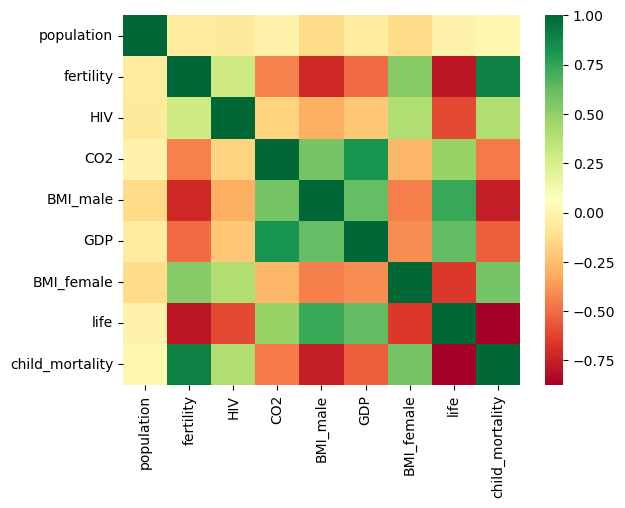

In [59]:
gm1 = gm.drop(['Region'], axis=1)
sns.heatmap(gm1.corr(), cmap='RdYlGn')

0.6192442167740035


C:\Users\Zach's PC\AppData\Local\Temp\ipykernel_22568\2068549471.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
C:\Users\Zach's PC\AppData\Local\Temp\ipykernel_22568\2068549471.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:,None], y))
C:\Users\Zach's PC\AppData\Local\Temp\ipykernel_22568\2068549471.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ax.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')


Text(0, 0.5, 'Fertility')

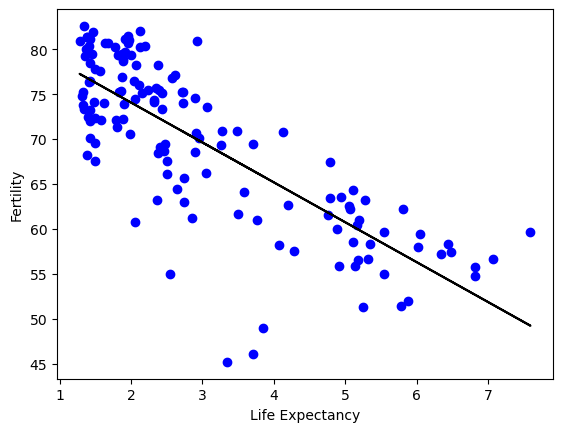

In [37]:
x = gm['fertility']
y = gm['life']

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:,None], y))

fig, ax = plt.subplots()
ax.plot(x, y, 'bo', x, regression.predict(x[:, None]), '-k')
ax.set_xlabel('Life Expectancy')
ax.set_ylabel('Fertility')

In [38]:
cvs = cross_val_score(regression, x[:, None], y, cv=5)
print(cvs, '\n', sum(cvs)/5)

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561] 
 0.6168819644425119


C:\Users\Zach's PC\AppData\Local\Temp\ipykernel_22568\2408852758.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cvs = cross_val_score(regression, x[:, None], y, cv=5)


In [ ]:
# The average of these scores of the cross_val_score is very similar to that of the regression.score.

In [39]:
x = gm[['fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']]
y = gm['life']

regression = LinearRegression()
regression.fit(x, y)
print(regression.score(x, y))

0.8974995317332959


In [40]:
# Regression score better when all of the variables used compared to when only Fertility used

In [41]:
cvs = cross_val_score(regression, x, y, cv=5)
print(cvs, '\n', sum(cvs)/5)

[0.81621881 0.8322471  0.90868335 0.81325568 0.94404223] 
 0.8628894343260081


In [42]:
# The average of these scores of the cross_val_score is slightly lower than that of the regression.score.

In [43]:
# 2. Logistic Regression

In [45]:
cc = pd.read_csv('creditcard.csv')
cc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [48]:
frauds = cc.loc[cc['Class'] == 1]
non_frauds = cc.loc[cc['Class'] == 0]

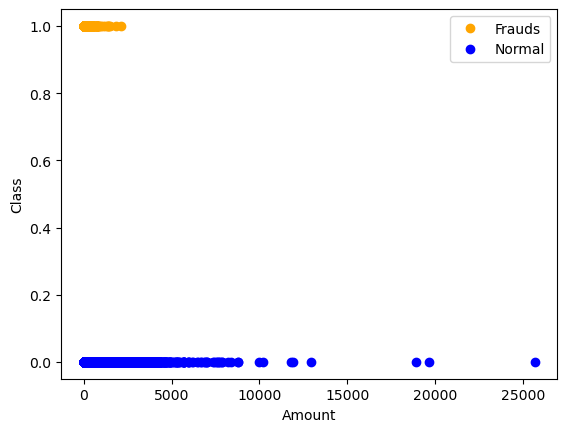

In [54]:
plt.plot(frauds.Amount, frauds.Class, 'o', color='orange', label='Frauds')
plt.plot(non_frauds.Amount, non_frauds.Class, 'o', color='blue', label='Normal')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()

[[284156    159]
 [   151    341]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

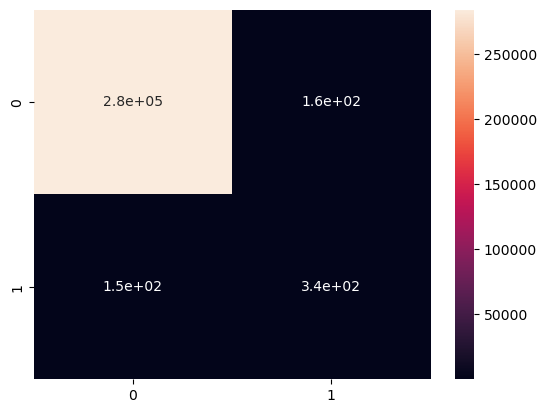

In [58]:
x = cc.drop('Class', axis=1)
y = cc.Class

log_regression = LogisticRegression()
log_regression.fit(x, y)
y_pred = log_regression.predict(x)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True)